<a href="https://colab.research.google.com/github/flowmasterB/learningPyTorch/blob/main/00_pytorch_math_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I went through Mike Cohen's deep learning course (modified from the original - I add more comments and code where I see fit to further solidify concepts) and will walk you through it -- or you can sign up here:
https://www.udemy.com/course/deeplearning_x/learn/lecture/27841856#overview

In [79]:
 # HERE WE GO WITH SOME NEURAL NETWORKS AND MATPLOTLIB!!!!
import numpy as np
import torch
import torch.nn as nn # import PyTorch Neural Network library
import matplotlib.pyplot as plt # matplot library for plotting
import os # for images


# Softmax -- we can use for categories of stuff -- cat or dog? etc...
# https://en.wikipedia.org/wiki/Softmax_function

 
[0.02019046 0.90253769 0.04966053 0.01108076 0.01653055]
 
1.0
 


(None, None)

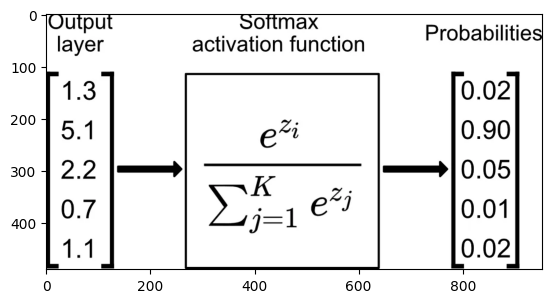

In [80]:
# manually lol in numpy
# list of numbers # let's see what happens when we use the values from the image below
z = [1.3,5.1,2.2,0.7,1.1]

# Here we see the softmax function in a visual
img = plt.imread('softmax.png')
plt.imshow(img), print(' ') # we can see the image below

# compute softmax result
num = np.exp(z) # this is e a natural exponent 2.718--- on and on non repeating irrational number
den = np.sum( np.exp(z) ) # i represents the elements of the sets
sigma = num / den # sigma represents the result always equal to 1 probalities results sum to 1
# .02 + .9 + .05 + .01 .02 -- you can do that in head, equals 1 -- the weird E indicates SUM

print(sigma), print(' ') # the output is close to the image! the images values have been rounded
# We put things in and get n values outputed as probabilities we can use for data driven decisions
# solutions, etc... this is ideal for category choosing -- cat or dog? rat or car? etc...
print(np.sum(sigma)), print(' ') # we can see the total computes to 1

In [81]:
# Let's try with some random integers
# z = np.random.randint( -5, high=15,size=25)
# print(z), print({type(z)})

In [82]:
# compute softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

print(sigma), print(' ')

[0.02019046 0.90253769 0.04966053 0.01108076 0.01653055]
 


(None, None)

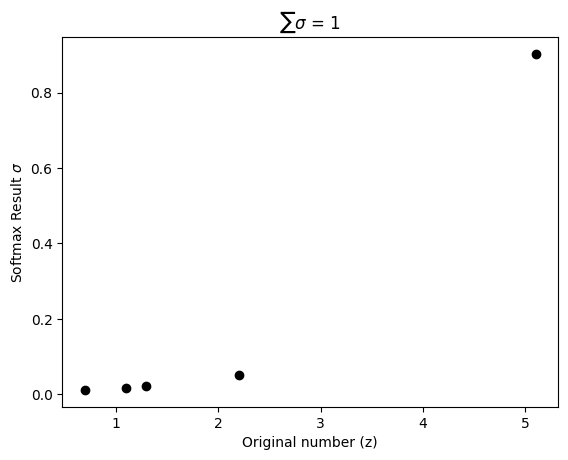

In [92]:
# Let's compare
plt.plot(z,sigma,'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmax Result $\sigma$')
# since we have the result a logarithmic function, lets set the y scale as a log
# plt.yscale('log') # this is a linear transformation in log space - comment and uncomment to see
plt.title('$\sum\sigma$ = %g'%np.sum(sigma))
plt.show()

# Using PyTorch

tensor([0.0202, 0.9025, 0.0497, 0.0111, 0.0165])
 
<class 'list'>
<class 'torch.Tensor'>


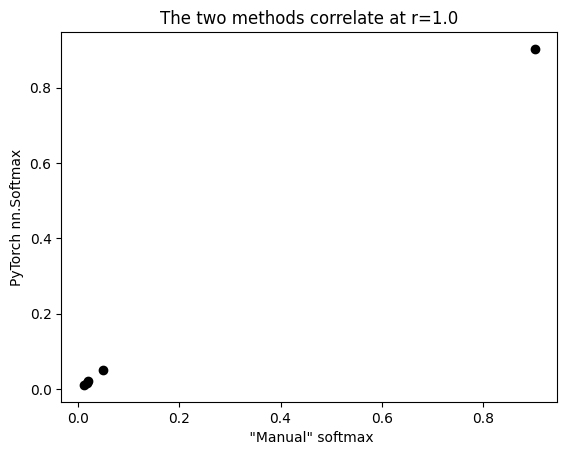

tensor(1.)


In [91]:
# We get more involved using PyTorch
# Let's create a list then a variable
zT = [1.3,5.1,2.2,0.7,1.1]
softFunct = nn.Softmax(dim=0) # calling neural network library with PyTorch Softmax class

# Let's apply the data to the function
sigmaT = softFunct( torch.Tensor(zT) )
# and return the results
print(sigmaT), print(' ')
print(type(zT)) # list before
print(type( torch.Tensor(zT))) # transformed into a torch tensor

# let's show congruency
plt.plot(sigma, sigmaT, 'ko')
plt.xlabel(' "Manual" softmax')
plt.ylabel('PyTorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()
print(torch.sum(sigmaT)) # We get a 1 -- SWEET!!! NumPy result == PyTorch result!!!!